In [1]:
import sys 

path_helper = '../input/function'
sys.path.insert(1, path_helper)

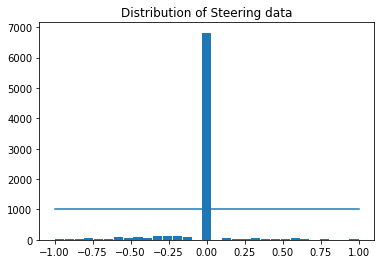

removed imgs:  5820
remain imgs:  2362


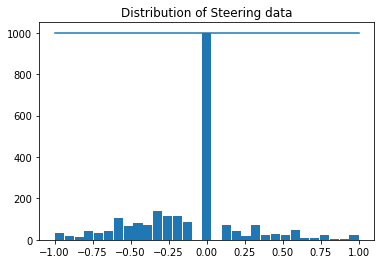

,Center,Left,Right,Steering,Throttle,Brake,Speed
11,center_2022_11_10_13_54_50_391.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,1.000000,0,2.378199
14,center_2022_11_10_13_54_50_729.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.30,1.000000,0,6.545609
15,center_2022_11_10_13_54_50_845.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.60,1.000000,0,7.849895
16,center_2022_11_10_13_54_50_965.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.90,1.000000,0,9.073349
24,center_2022_11_10_13_54_51_826.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,-0.15,0.000000,0,11.193010
...,...,...,...,...,...,...,...
8165,center_2022_11_10_15_10_52_420.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,0.484859,0,30.055230
8173,center_2022_11_10_15_10_53_265.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,0.000000,0,27.800040
8176,center_2022_11_10_15_10_53_592.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,0.000000,0,26.862330
8179,center_2022_11_10_15_10_53_875.jpg,C:\Users\viet tran\Desktop\Masterthesis\Progra...,C:\Users\viet tran\Desktop\Masterthesis\Progra...,0.00,0.000000,0,26.113950


In [2]:
from helper import * 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

path = '../input/cnndata/data'
df = load_data(f'{path}/driving_log.csv')
df = balance_data(df, 'Steering')
df

The car go straight most of the time that makes steering values around 0 extremely higher than the other. Drop the steering data to balance the whole dataset. 

In [3]:
img_path, steering = load_data_to_array(path, df)
# fixed value for random_state to keep train and test datasets same each time
X_train, X_val, Y_train, Y_val = train_test_split(img_path, steering, test_size=0.2, random_state=1) 
X_train, Y_train = img_preprocess_pipeline(X_train, Y_train, 1)
X_val, Y_val = img_preprocess_pipeline(X_val, Y_val, 0 )

print(X_train.shape)
print(Y_train.shape)
print("Training imgs: ", len(X_train))
print("Test imgs: ", len(X_val))

(1889, 70, 200, 3)
(1889,)
Training imgs:  1889
Test imgs:  473


In [4]:
import wandb
from wandb.keras import WandbCallback
from wandb_config import sweep_config

wandb.init(project='test')

sweep_id = wandb.sweep(sweep_config, project='test')
log_callback = WandbCallback(log_evaluation=True)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Create sweep with ID: uboard79
Sweep URL: https://wandb.ai/viettran/test/sweeps/uboard79


In [5]:

def train(config=None):
    with wandb.init(config=config):
        config = wandb.config
        
        optim = build_optimizer(config.optimizer, config.learning_rate)
        model = build_network(activation=config.activation, optimizer=optim, dropout=config.dropout)
        
        model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=20,
                        verbose=1, epochs=config.epochs, callbacks=[log_callback])

In [ ]:
wandb.agent(sweep_id, train, count=50)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: ms9qnyi7 with config:
wandb: 	activation: elu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: Adadelta


2022-11-10 14:40:34.036630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:40:34.042820: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:40:34.049526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:40:34.051800: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/15


2022-11-10 14:41:27.175440: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


95/95 [==============================] - 11s 29ms/step - loss: 0.8602 - acc: 0.3081 - val_loss: 0.3204 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 3s 27ms/step - loss: 0.7197 - acc: 0.3415 - val_loss: 0.2320 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6770 - acc: 0.3404 - val_loss: 0.2004 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: 0.6403 - acc: 0.3393 - val_loss: 0.1950 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6244 - acc: 0.3399 - val_loss: 0.2190 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.5348 - acc: 0.3436 - val_loss: 0.1878 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.5207 - acc: 0.3452 - val_loss: 0.1667 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.4992 - acc: 0.3467

acc,▁▅▅▅▅▆▆▆▇▆▇█▆▇▇
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▆▅▅▄▃▃▂▂▂▂▂▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▅▄▃▄▃▂▂▂▂▂▁▁▂▁
GFLOPS,0.42216
acc,0.35416
best_epoch,11
best_val_loss,0.13339
epoch,14
loss,0.41899


wandb: Agent Starting Run: vfrwgauc with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam
wandb: Currently logged in as: viettran. Use `wandb login --relogin` to force relogin


2022-11-10 14:43:41.666243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:43:41.666756: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:43:41.666937: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:43:41.667651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:43:41.668103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:43:41.668486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 27ms/step - loss: 0.4312 - acc: 0.3621 - val_loss: 0.1296 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1931 - acc: 0.4071 - val_loss: 0.1690 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1508 - acc: 0.4172 - val_loss: 0.1431 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1408 - acc: 0.4172 - val_loss: 0.1483 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1357 - acc: 0.4172 - val_loss: 0.1519 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1345 - acc: 0.4172 - val_loss: 0.1479 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1338 - acc: 0.4172 - val_loss: 0.1458 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1349 - a

acc,▁▇█████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁█▃▄▅▄▄▄▄▃▄▄▃▄▄
GFLOPS,0.42216
acc,0.41715
best_epoch,0
best_val_loss,0.12956
epoch,14
loss,0.13349


wandb: Agent Starting Run: r61z1ayn with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: RMSprop


2022-11-10 14:45:09.996686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:45:09.997073: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:45:09.997247: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:45:09.997756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:45:09.998131: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:45:09.998454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 27ms/step - loss: 0.6661 - acc: 0.3219 - val_loss: 0.1327 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 25ms/step - loss: 0.4482 - acc: 0.3478 - val_loss: 0.4117 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 26ms/step - loss: 0.3196 - acc: 0.3695 - val_loss: 0.1306 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2459 - acc: 0.3891 - val_loss: 0.1369 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1968 - acc: 0.4066 - val_loss: 0.1685 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1803 - acc: 0.4092 - val_loss: 0.1287 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1691 - acc: 0.4145 - val_loss: 0.1316 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 26ms/step - loss: 0.1542 - a

acc,▁▃▅▆▇▇█████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁█▁▁▂▁▁▁▁▂▁▁▂▁▁
GFLOPS,0.42216
acc,0.41715
best_epoch,5
best_val_loss,0.12868
epoch,14
loss,0.13791


wandb: Agent Starting Run: subcaw2u with config:
wandb: 	activation: relu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adadelta


2022-11-10 14:46:42.877445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:46:42.877842: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:46:42.878014: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:46:42.878594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:46:42.878975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:46:42.879258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 29ms/step - loss: 0.1753 - acc: 0.4050 - val_loss: 0.1413 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1634 - acc: 0.4134 - val_loss: 0.1403 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1533 - acc: 0.4156 - val_loss: 0.1400 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1489 - acc: 0.4166 - val_loss: 0.1400 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1463 - acc: 0.4172 - val_loss: 0.1400 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1415 - acc: 0.4172 - val_loss: 0.1399 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1436 - acc: 0.4172 - val_loss: 0.1397 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1431 - a

acc,▁▆▇████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▆▄▃▂▂▂▂▁▁▁▁▂▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▄▃▃▂▂▁▁▂▂▂▂▂▂▂
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13959
val_acc,0.40381
val_loss,0.13993


wandb: Agent Starting Run: jb1xbx5v with config:
wandb: 	activation: elu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adadelta


2022-11-10 14:48:10.740027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:48:10.740413: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:48:10.740611: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:48:10.741098: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:48:10.741481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:48:10.741784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 30ms/step - loss: 0.7276 - acc: 0.2970 - val_loss: 0.1703 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6519 - acc: 0.3213 - val_loss: 0.1908 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6905 - acc: 0.3224 - val_loss: 0.1935 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6524 - acc: 0.3171 - val_loss: 0.1910 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.5700 - acc: 0.3277 - val_loss: 0.1859 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 25ms/step - loss: 0.5691 - acc: 0.3208 - val_loss: 0.1897 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.5599 - acc: 0.3250 - val_loss: 0.1913 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.5488 - a

acc,▁▅▆▅▇▅▆▆▆▇▆▆▇██
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▆▇▆▄▄▃▃▃▂▂▂▁▁▂
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁▆▇▆▅▆▆▆▇██▆▇▄▄
GFLOPS,0.42216
acc,0.33245
epoch,14
loss,0.48883
val_acc,0.40381
val_loss,0.18214


wandb: Agent Starting Run: bgzrmn2w with config:
wandb: 	activation: elu
wandb: 	dropout: 0.4
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: adam


2022-11-10 14:49:48.061449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:49:48.061849: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:49:48.062019: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:49:48.062653: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:49:48.063031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:49:48.063318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 26ms/step - loss: 0.8634 - acc: 0.3219 - val_loss: 0.1421 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3376 - acc: 0.3637 - val_loss: 0.1347 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.3022 - acc: 0.3684 - val_loss: 0.1464 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2805 - acc: 0.3764 - val_loss: 0.1482 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2532 - acc: 0.3875 - val_loss: 0.1386 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2269 - acc: 0.3981 - val_loss: 0.1406 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2369 - acc: 0.3933 - val_loss: 0.1415 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2194 - a

acc,▁▄▅▅▆▇▇▇▇██▇███
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▅▁▇█▃▄▅▇▂▃▁▁▃▄▂
GFLOPS,0.42216
acc,0.40868
epoch,14
loss,0.19531
val_acc,0.40381
val_loss,0.13678


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bdw4o0dw with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: Adadelta


2022-11-10 14:51:56.763985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:51:56.764482: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:51:56.764655: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:51:56.765213: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:51:56.765631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:51:56.765922: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 27ms/step - loss: 0.7128 - acc: 0.3256 - val_loss: 0.1283 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.7233 - acc: 0.3092 - val_loss: 0.1355 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 25ms/step - loss: 0.6846 - acc: 0.3192 - val_loss: 0.1321 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6982 - acc: 0.3150 - val_loss: 0.1296 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6749 - acc: 0.3213 - val_loss: 0.1533 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6392 - acc: 0.3139 - val_loss: 0.1340 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6286 - acc: 0.3203 - val_loss: 0.1272 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.6035 - a

acc,█▁▅▃▆▃▅█▅▃▇▇▅▅█
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,██▇▇▆▅▄▄▅▄▃▂▁▂▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▂▄▃▂█▃▁▂▆▅▄▅▂▁▃
GFLOPS,0.42216
acc,0.32557
best_epoch,13
best_val_loss,0.12554
epoch,14
loss,0.53563


wandb: Agent Starting Run: y605qwzm with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: RMSprop


2022-11-10 14:53:31.963949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:53:31.964334: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:53:31.964534: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:53:31.965094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:53:31.965482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:53:31.965791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 28ms/step - loss: 0.6613 - acc: 0.3023 - val_loss: 0.1290 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 25ms/step - loss: 0.4306 - acc: 0.3425 - val_loss: 0.4449 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3058 - acc: 0.3732 - val_loss: 0.1997 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2350 - acc: 0.3960 - val_loss: 0.1589 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1939 - acc: 0.4087 - val_loss: 0.1747 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1774 - acc: 0.4150 - val_loss: 0.1327 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1655 - acc: 0.4172 - val_loss: 0.1405 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1495 - a

acc,▁▃▅▇▇██████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁█▃▂▂▁▁▂▁▁▁▂▁▁▁
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13515
val_acc,0.40381
val_loss,0.1419


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7f1cdipq with config:
wandb: 	activation: elu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: Adadelta


2022-11-10 14:55:07.162933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:55:07.163330: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:55:07.163518: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:55:07.164169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:55:07.164565: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:55:07.164878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 29ms/step - loss: 1.1473 - acc: 0.2917 - val_loss: 0.1606 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 25ms/step - loss: 0.9647 - acc: 0.2970 - val_loss: 0.1492 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.7937 - acc: 0.3277 - val_loss: 0.1460 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: 0.7471 - acc: 0.3319 - val_loss: 0.1430 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.6622 - acc: 0.3335 - val_loss: 0.1374 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.5958 - acc: 0.3219 - val_loss: 0.1360 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.5768 - acc: 0.3272 - val_loss: 0.1352 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.4987 - a

acc,▁▁▄▅▅▄▄▆▆▆▆▇█▇█
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▆▅▅▄▃▃▃▂▂▂▂▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▅▄▃▃▃▃▂▂▂▂▁▁▁
GFLOPS,0.42216
acc,0.36686
epoch,14
loss,0.32108
val_acc,0.40381
val_loss,0.12649


wandb: Agent Starting Run: kzqph22m with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: RMSprop


2022-11-10 14:56:36.593656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:56:36.594089: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:56:36.594267: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:56:36.594840: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:56:36.595224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:56:36.595554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 29ms/step - loss: 0.5555 - acc: 0.3139 - val_loss: 0.1737 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3785 - acc: 0.3552 - val_loss: 0.1287 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 25ms/step - loss: 0.2859 - acc: 0.3764 - val_loss: 0.1508 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2216 - acc: 0.3976 - val_loss: 0.1350 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1903 - acc: 0.4071 - val_loss: 0.1292 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 25ms/step - loss: 0.1729 - acc: 0.4097 - val_loss: 0.1808 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1643 - acc: 0.4140 - val_loss: 0.1298 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1560 - a

acc,▁▄▅▇▇▇█████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▃▂▂▂▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▇▁▄▂▁█▁▃▃▃▂▁▄▁▅
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13716
val_acc,0.40381
val_loss,0.15706


wandb: Agent Starting Run: 3ddeh4e6 with config:
wandb: 	activation: relu
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: RMSprop


2022-11-10 14:58:05.834534: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:58:05.834936: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 14:58:05.835099: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 14:58:05.835895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:58:05.836280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 14:58:05.836632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 57s 27ms/step - loss: 0.1438 - acc: 0.4172 - val_loss: 0.1451 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1348 - acc: 0.4172 - val_loss: 0.1456 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1338 - acc: 0.4172 - val_loss: 0.1471 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1438 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1339 - acc: 0.4172 - val_loss: 0.1445 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1336 - acc: 0.4172 - val_loss: 0.1436 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1338 - acc: 0.4172 - val_loss: 0.1441 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1344 - 

acc,███████▁███████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▁▁▁▁▁▂▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▄▅█▂▃▂▂▃▂▂▁▅▂▂▁
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13371
val_acc,0.40381
val_loss,0.14347


wandb: Agent Starting Run: 6e7xvvp5 with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.4
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: RMSprop


2022-11-10 15:00:27.337861: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:00:27.338252: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:00:27.338416: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:00:27.339054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:00:27.339445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:00:27.339770: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 29ms/step - loss: 1.1380 - acc: 0.2896 - val_loss: 0.3534 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.6543 - acc: 0.3150 - val_loss: 0.2380 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.4814 - acc: 0.3277 - val_loss: 0.1294 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.3458 - acc: 0.3637 - val_loss: 0.1509 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2499 - acc: 0.3880 - val_loss: 0.1289 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2039 - acc: 0.4039 - val_loss: 0.1855 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1676 - acc: 0.4156 - val_loss: 0.1503 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1549 - a

acc,▁▂▃▅▆▇█████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▄▁▂▁▃▂▂▂▂▂▂▁▁▂
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13392
val_acc,0.40381
val_loss,0.14516


wandb: Agent Starting Run: 600o20yt with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: RMSprop


2022-11-10 15:01:59.467868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:01:59.468263: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:01:59.468445: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:01:59.469036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:01:59.469450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:01:59.469777: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 27ms/step - loss: 0.5820 - acc: 0.3287 - val_loss: 0.1346 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.4073 - acc: 0.3552 - val_loss: 0.1525 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3093 - acc: 0.3589 - val_loss: 0.1290 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2556 - acc: 0.3790 - val_loss: 0.1289 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2077 - acc: 0.4013 - val_loss: 0.1312 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1751 - acc: 0.4145 - val_loss: 0.1299 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1667 - acc: 0.4161 - val_loss: 0.1786 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1577 - a

acc,▁▃▃▅▇██████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▄▃▂▂▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▂▄▁▁▁▁█▅▂▃▆▄▃▅▄
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13678
val_acc,0.40381
val_loss,0.15107


wandb: Agent Starting Run: qaegc59i with config:
wandb: 	activation: elu
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: RMSprop


2022-11-10 15:03:31.140455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:03:31.140994: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:03:31.141191: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:03:31.142176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:03:31.142699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:03:31.143174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 28ms/step - loss: 24.0532 - acc: 0.2753 - val_loss: 0.2929 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 4.4211 - acc: 0.2896 - val_loss: 0.1901 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.6003 - acc: 0.3160 - val_loss: 0.1503 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: 0.7356 - acc: 0.3325 - val_loss: 0.1373 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 11.3436 - acc: 0.3684 - val_loss: 0.1395 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 24ms/step - loss: 2.0438 - acc: 0.3769 - val_loss: 0.1440 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.4138 - acc: 0.3653 - val_loss: 0.1450 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3577 -

acc,▁▂▃▄▆▆▆▆▇▇▇▇███
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▁▁▄▂▁▁▁▁▂▁▁▁▁
val_acc,█████████▁█████
val_loss,▁▁▁▁▁▁▁▁▁█▁▁▁▁▁
GFLOPS,0.42216
acc,0.41239
epoch,14
loss,0.32424
val_acc,0.40381
val_loss,0.1462


wandb: Agent Starting Run: vf0d475w with config:
wandb: 	activation: relu
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: RMSprop


2022-11-10 15:04:59.331363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:04:59.331762: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:04:59.331937: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:04:59.332537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:04:59.332933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:04:59.333221: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 27ms/step - loss: 0.1374 - acc: 0.4172 - val_loss: 0.1388 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1450 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 26ms/step - loss: 0.1345 - acc: 0.4172 - val_loss: 0.1391 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1340 - acc: 0.4172 - val_loss: 0.1407 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1342 - acc: 0.4172 - val_loss: 0.1423 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1320 - acc: 0.4166 - val_loss: 0.1175 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1177 - acc: 0.4166 - val_loss: 0.0864 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1024 - a

acc,█████▆▆▆▃▁▃▁▅█▅
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█████▇▆▄▃▃▃▂▂▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▇█▇██▆▃▁▁▁▂▄▁▂▂
GFLOPS,0.42216
acc,0.41609
best_epoch,12
best_val_loss,0.06685
epoch,14
loss,0.07758


wandb: Agent Starting Run: k9uyjzx9 with config:
wandb: 	activation: elu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: adam


2022-11-10 15:06:27.603371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:06:27.603771: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:06:27.603927: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:06:27.604632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:06:27.605070: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:06:27.605369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 23s 239ms/step - loss: nan - acc: 0.3981 - val_loss: nan - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 24ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.403

wandb: WARNING Error durring prediction logging for epoch: Existing data [nan], of type Invalid[] cannot be cast to Invalid[]


acc,▁██████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,nan
val_acc,0.40381
val_loss,nan


wandb: Agent Starting Run: vpp94e37 with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: Adadelta


2022-11-10 15:08:38.370721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:08:38.371114: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:08:38.371284: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:08:38.371901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:08:38.372398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:08:38.372734: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 27ms/step - loss: 0.5197 - acc: 0.3335 - val_loss: 0.1498 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.5003 - acc: 0.3319 - val_loss: 0.1527 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.4772 - acc: 0.3319 - val_loss: 0.1500 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.5018 - acc: 0.3362 - val_loss: 0.1413 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.4501 - acc: 0.3335 - val_loss: 0.1536 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.4752 - acc: 0.3346 - val_loss: 0.1579 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.4521 - acc: 0.3415 - val_loss: 0.1554 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.4073 - a

acc,▁▁▁▂▁▂▃▅▄▆▅▅▆▇█
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▇▆▇▅▆▅▄▃▃▃▂▃▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▅▆▅▂▇█▇▃▄▄▁▂▃▃▁
GFLOPS,0.42216
acc,0.36263
epoch,14
loss,0.33497
val_acc,0.40381
val_loss,0.13806


wandb: Agent Starting Run: li3a992p with config:
wandb: 	activation: relu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: RMSprop


2022-11-10 15:10:11.186250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:10:11.186691: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:10:11.186866: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:10:11.187616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:10:11.187994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:10:11.188283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 27ms/step - loss: 0.1390 - acc: 0.4161 - val_loss: 0.1432 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1347 - acc: 0.4166 - val_loss: 0.1451 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 25ms/step - loss: 0.1355 - acc: 0.4150 - val_loss: 0.1434 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1340 - acc: 0.4172 - val_loss: 0.1434 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1485 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1339 - acc: 0.4172 - val_loss: 0.1449 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1425 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1344 - a

acc,▅▆▁███████▅▆▆▅▅
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▇▇▇▇▇▇▇▇▇▆▃▂▂▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▇▇▇▇█▇▇▇▇▇▃▁▅▂▁
GFLOPS,0.42216
acc,0.41609
epoch,14
loss,0.10984
val_acc,0.40381
val_loss,0.10543


wandb: Agent Starting Run: mbijpufo with config:
wandb: 	activation: relu
wandb: 	dropout: 0.4
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: sgd


2022-11-10 15:11:44.660380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:11:44.660778: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:11:44.660945: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:11:44.661559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:11:44.662206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:11:44.662576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 26ms/step - loss: 0.1775 - acc: 0.4150 - val_loss: 0.1411 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1343 - acc: 0.4172 - val_loss: 0.1380 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1340 - acc: 0.4172 - val_loss: 0.1419 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1335 - acc: 0.4172 - val_loss: 0.1461 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1417 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1338 - acc: 0.4172 - val_loss: 0.1434 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1335 - acc: 0.4172 - val_loss: 0.1469 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1338 - a

acc,▁██████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▃▁▄▇▄▅█▃▃▃▄▅▁▇▄
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13362
val_acc,0.40381
val_loss,0.1415


wandb: Agent Starting Run: c9jzg9hk with config:
wandb: 	activation: relu
wandb: 	dropout: 0.4
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: Adadelta


2022-11-10 15:13:13.194094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:13:13.194512: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:13:13.194675: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:13:13.195522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:13:13.195928: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:13:13.196216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 27ms/step - loss: 0.1788 - acc: 0.3992 - val_loss: 0.1418 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1552 - acc: 0.4150 - val_loss: 0.1423 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1458 - acc: 0.4172 - val_loss: 0.1427 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1425 - acc: 0.4166 - val_loss: 0.1429 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1403 - acc: 0.4172 - val_loss: 0.1428 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1411 - acc: 0.4172 - val_loss: 0.1428 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1386 - acc: 0.4172 - val_loss: 0.1427 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1389 - a

acc,▁▇█████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁▄▇███▇▇▇▇▇▇███
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13581
val_acc,0.40381
val_loss,0.14287


wandb: Agent Starting Run: vzwm9lev with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: sgd


2022-11-10 15:14:45.877833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:14:45.878214: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:14:45.878390: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:14:45.879112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:14:45.879639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:14:45.880060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 28ms/step - loss: 0.8799 - acc: 0.3139 - val_loss: 0.1456 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.3313 - acc: 0.3605 - val_loss: 0.1806 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2418 - acc: 0.3902 - val_loss: 0.1288 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1825 - acc: 0.4103 - val_loss: 0.1350 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1603 - acc: 0.4161 - val_loss: 0.1483 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 25ms/step - loss: 0.1452 - acc: 0.4172 - val_loss: 0.1474 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1408 - acc: 0.4172 - val_loss: 0.1485 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1377 - a

acc,▁▄▆████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▃█▁▂▄▄▄▃▃▄▃▃▃▃▃
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13429
val_acc,0.40381
val_loss,0.13992


wandb: Agent Starting Run: h55vsx2n with config:
wandb: 	activation: elu
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: sgd


2022-11-10 15:16:20.115996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:16:20.116405: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:16:20.116633: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:16:20.117438: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:16:20.117841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:16:20.118146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 27ms/step - loss: 83828.1875 - acc: 0.0646 - val_loss: 2.2333 - val_acc: 0.0042
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 26861277184.0000 - acc: 0.0439 - val_loss: 1.7006 - val_acc: 0.0042
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 25608484864.0000 - acc: 0.0725 - val_loss: 0.9622 - val_acc: 0.0042
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 4220787968.0000 - acc: 0.1503 - val_loss: 0.5358 - val_acc: 0.0042
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.4813 - acc: 0.1985 - val_loss: 0.5352 - val_acc: 0.0042
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 106370.7734 - acc: 0.1498 - val_loss: 0.7597 - val_acc: 0.0042
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6315 - acc: 0.1027 - val_loss: 0.7602 - val_acc: 0.0042
Epoch 8/15
95/95 [===========================

acc,▂▁▂▆█▆▄▃▄▆▆▆▆▄▄
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,▁██▂▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▆▃▁▁▂▂▂▁▁▁▁▂▂▂
GFLOPS,0.42216
acc,0.10164
epoch,14
loss,0.61803
val_acc,0.00423
val_loss,0.71813


wandb: Agent Starting Run: 6vjpmejr with config:
wandb: 	activation: elu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


2022-11-10 15:17:48.637551: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:17:48.637953: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:17:48.638110: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:17:48.639048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:17:48.639462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:17:48.639796: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 26ms/step - loss: nan - acc: 0.4050 - val_loss: nan - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 25ms/step - loss: nan - acc: 0.4172 - val_loss: nan - val_acc: 0.4038


wandb: WARNING Error durring prediction logging for epoch: Existing data [nan], of type Invalid[] cannot be cast to Invalid[]


acc,▁██████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,nan
val_acc,0.40381
val_loss,nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mksj346p with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


2022-11-10 15:19:19.246751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:19:19.247133: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:19:19.247303: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:19:19.248011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:19:19.248452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:19:19.248774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 27ms/step - loss: 0.8577 - acc: 0.3224 - val_loss: 0.1398 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3993 - acc: 0.3420 - val_loss: 0.1462 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.3761 - acc: 0.3536 - val_loss: 0.1456 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.3449 - acc: 0.3669 - val_loss: 0.1504 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2947 - acc: 0.3743 - val_loss: 0.1902 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2535 - acc: 0.3833 - val_loss: 0.1359 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2259 - acc: 0.3965 - val_loss: 0.1702 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1984 - a

acc,▁▂▃▄▅▅▆▇███████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▃▃▃▂▂▂▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▂▃▃▃█▂▆▄▁▄▄▃▃▇▃
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.15177
val_acc,0.40381
val_loss,0.14571


wandb: Agent Starting Run: q7lgfese with config:
wandb: 	activation: relu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: adam


2022-11-10 15:20:46.838203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:20:46.838564: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:20:46.838720: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:20:46.839554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:20:46.839919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:20:46.840218: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 26ms/step - loss: 0.1390 - acc: 0.4172 - val_loss: 0.1500 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1341 - acc: 0.4172 - val_loss: 0.1492 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1333 - acc: 0.4172 - val_loss: 0.1480 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1334 - acc: 0.4172 - val_loss: 0.1479 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1343 - acc: 0.4172 - val_loss: 0.1471 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1338 - acc: 0.4172 - val_loss: 0.1475 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1336 - acc: 0.4172 - val_loss: 0.1462 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1336 - a

acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▁▁▂▂▁▁▂▂▁▂▂▁▂
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▄▅▃▁▂▂▁▂▂▂▁
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13385
val_acc,0.40381
val_loss,0.1442


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4ct8u9ki with config:
wandb: 	activation: relu
wandb: 	dropout: 0.4
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: Adadelta


2022-11-10 15:22:24.506204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:22:24.506620: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:22:24.506786: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:22:24.507496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:22:24.507856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:22:24.508141: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 26ms/step - loss: 0.1733 - acc: 0.4134 - val_loss: 0.1431 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1604 - acc: 0.4161 - val_loss: 0.1434 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1661 - acc: 0.4156 - val_loss: 0.1436 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1607 - acc: 0.4161 - val_loss: 0.1438 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1661 - acc: 0.4166 - val_loss: 0.1439 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1554 - acc: 0.4172 - val_loss: 0.1439 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1531 - acc: 0.4172 - val_loss: 0.1441 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1503 - a

acc,▁▆▅▆▇██▆▇██████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▆▅▆▄▃▃▄▃▂▂▁▂▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁▃▅▆▇▇███▇▇▇▇▇▇
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.14471
val_acc,0.40381
val_loss,0.14392


wandb: Agent Starting Run: n0w37byu with config:
wandb: 	activation: relu
wandb: 	dropout: 0.4
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: RMSprop


2022-11-10 15:23:53.598095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:23:53.598517: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:23:53.598687: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:23:53.599390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:23:53.599843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:23:53.600152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 26ms/step - loss: 0.1384 - acc: 0.4166 - val_loss: 0.1435 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1342 - acc: 0.4172 - val_loss: 0.1422 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1439 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1341 - acc: 0.4172 - val_loss: 0.1436 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1342 - acc: 0.4172 - val_loss: 0.1426 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1421 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1336 - acc: 0.4172 - val_loss: 0.1417 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1336 - a

acc,▁██████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▁▂▂▁▁▁▁▁▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▆▂▇▆▄▂▁▅▄█▇▃▂▇▃
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13356
val_acc,0.40381
val_loss,0.14243


wandb: Agent Starting Run: rfcqhhcm with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.4
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: RMSprop


2022-11-10 15:25:21.185130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:25:21.185535: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:25:21.185696: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:25:21.186365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:25:21.186784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:25:21.187086: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 4s 27ms/step - loss: 0.8823 - acc: 0.2901 - val_loss: 0.1895 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 26ms/step - loss: 0.5100 - acc: 0.3266 - val_loss: 0.1306 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3664 - acc: 0.3594 - val_loss: 0.1313 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2700 - acc: 0.3790 - val_loss: 0.1491 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.2123 - acc: 0.4029 - val_loss: 0.1548 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 3s 28ms/step - loss: 0.1806 - acc: 0.4113 - val_loss: 0.1523 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1591 - acc: 0.4172 - val_loss: 0.1527 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 24ms/step - loss: 0.1501 - a

acc,▁▃▅▆▇██████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▃▂▂▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▁▁▃▄▄▄▂▂▂▃▃▂▂▃
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.1339
val_acc,0.40381
val_loss,0.14636


wandb: Agent Starting Run: lq9wtdn7 with config:
wandb: 	activation: elu
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: Adadelta


2022-11-10 15:26:53.941033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:26:53.941411: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:26:53.941594: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:26:53.942558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:26:53.942960: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:26:53.943257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 27ms/step - loss: 0.4837 - acc: 0.3298 - val_loss: 0.1363 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3839 - acc: 0.3452 - val_loss: 0.1798 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3590 - acc: 0.3436 - val_loss: 0.1572 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.3364 - acc: 0.3594 - val_loss: 0.1500 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.3247 - acc: 0.3616 - val_loss: 0.1440 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.3098 - acc: 0.3547 - val_loss: 0.1440 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2843 - acc: 0.3663 - val_loss: 0.1427 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.2939 - a

acc,▁▃▃▄▅▄▅▅▅▆▆▇▇█▇
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▄▄▃▃▂▃▂▂▂▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▃█▅▄▄▄▃▅▃▂▂▁▁▂▁
GFLOPS,0.42216
acc,0.38539
epoch,14
loss,0.24566
val_acc,0.40381
val_loss,0.12654


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: a6kjdt0r with config:
wandb: 	activation: relu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: sgd


2022-11-10 15:28:32.104648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:28:32.105044: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:28:32.105207: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:28:32.106111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:28:32.106568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:28:32.106915: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 29ms/step - loss: 0.1425 - acc: 0.4161 - val_loss: 0.1446 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1412 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1339 - acc: 0.4172 - val_loss: 0.1423 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1340 - acc: 0.4172 - val_loss: 0.1435 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1336 - acc: 0.4172 - val_loss: 0.1500 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1334 - acc: 0.4172 - val_loss: 0.1395 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1339 - acc: 0.4172 - val_loss: 0.1406 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1338 - a

acc,▁██████████████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▄▂▃▄█▁▂▅▄▆▅▂▁▆▃
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13378
val_acc,0.40381
val_loss,0.1431


wandb: Agent Starting Run: 664uc62y with config:
wandb: 	activation: tanh
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.005
wandb: 	optimizer: Adadelta


2022-11-10 15:30:11.661246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:30:11.661793: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:30:11.661983: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:30:11.662716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:30:11.663119: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:30:11.663412: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 29ms/step - loss: 0.8445 - acc: 0.3192 - val_loss: 0.1516 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.7634 - acc: 0.3033 - val_loss: 0.1732 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.7577 - acc: 0.3065 - val_loss: 0.1399 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.7578 - acc: 0.3150 - val_loss: 0.1537 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 24ms/step - loss: 0.7034 - acc: 0.3240 - val_loss: 0.1584 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6864 - acc: 0.3060 - val_loss: 0.1378 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6522 - acc: 0.3145 - val_loss: 0.1421 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6689 - a

acc,▄▁▂▃▅▁▃▂▄▄▆▄▅▅█
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▆▆▆▅▅▄▄▄▃▃▃▂▂▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▄█▂▅▆▂▃▃▃▂▃▄▂▁▂
GFLOPS,0.42216
acc,0.34039
epoch,14
loss,0.52351
val_acc,0.40381
val_loss,0.13984


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: s0rq4568 with config:
wandb: 	activation: relu
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: Adadelta


2022-11-10 15:31:49.893471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:31:49.893859: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:31:49.894047: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:31:49.895011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:31:49.895372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:31:49.895703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 25ms/step - loss: 0.1347 - acc: 0.4172 - val_loss: 0.1412 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1339 - acc: 0.4172 - val_loss: 0.1421 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1335 - acc: 0.4172 - val_loss: 0.1424 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1345 - acc: 0.4172 - val_loss: 0.1418 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1418 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1337 - acc: 0.4172 - val_loss: 0.1418 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 22ms/step - loss: 0.1338 - acc: 0.4172 - val_loss: 0.1424 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.1335 - a

acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▃▁▇▂▂▃▁▁▂▂▅▁▂▃
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,▁▆█▅▄▅█▅██▆▇▇██
GFLOPS,0.42216
acc,0.41715
epoch,14
loss,0.13389
val_acc,0.40381
val_loss,0.14238


wandb: Agent Starting Run: rtvuvybz with config:
wandb: 	activation: elu
wandb: 	dropout: 0.2
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	optimizer: sgd


2022-11-10 15:33:14.553484: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:33:14.553887: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-11-10 15:33:14.554057: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-11-10 15:33:14.554864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:33:14.555254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 15:33:14.555587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

Epoch 1/15
95/95 [==============================] - 3s 28ms/step - loss: 5.9129 - acc: 0.2811 - val_loss: 0.3346 - val_acc: 0.4038
Epoch 2/15
95/95 [==============================] - 2s 24ms/step - loss: 1.3777 - acc: 0.2594 - val_loss: 0.3377 - val_acc: 0.4038
Epoch 3/15
95/95 [==============================] - 2s 23ms/step - loss: 0.8375 - acc: 0.2785 - val_loss: 0.1626 - val_acc: 0.4038
Epoch 4/15
95/95 [==============================] - 2s 23ms/step - loss: 0.7579 - acc: 0.2986 - val_loss: 0.1656 - val_acc: 0.4038
Epoch 5/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6837 - acc: 0.3197 - val_loss: 0.1682 - val_acc: 0.4038
Epoch 6/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6216 - acc: 0.3261 - val_loss: 0.1530 - val_acc: 0.4038
Epoch 7/15
95/95 [==============================] - 2s 24ms/step - loss: 0.6967 - acc: 0.3102 - val_loss: 0.3158 - val_acc: 0.4038
Epoch 8/15
95/95 [==============================] - 2s 23ms/step - loss: 0.6674 - a

acc,▂▁▂▄▅▅▄▅▅▆▇▇▇▇█
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▁▁▂▁▇▂▂▁▁▄▂▁▁
GFLOPS,0.42216
acc,0.36792
epoch,14
loss,0.32601
val_acc,0.40381
val_loss,0.16424


wandb: Agent Starting Run: zft679sh with config:
wandb: 	activation: relu
wandb: 	dropout: 0.3
wandb: 	epochs: 15
wandb: 	learning_rate: 0.01
wandb: 	optimizer: adam


In [ ]:
''' 
Iterations: number of batches to complete one epoch 
Batches: number of training samples in one iteration 
Steps per epoch = number of training sample // batch size
'''
